# Import Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers

from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.manifold import trustworthiness
from umap import UMAP

2025-05-09 03:05:18.482965: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746774318.649643  163036 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746774318.699313  163036 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746774319.088987  163036 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1746774319.089019  163036 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1746774319.089021  163036 computation_placer.cc:177] computation placer alr

# Functions

In [3]:
def plot_scores(clf, params_grid):
    """
    Plot training and testing scores against C values.
    
    Parameters:
    clf: Trained GridSearchCV object.
    params_grid: Dictionary containing the parameter grid used in GridSearchCV.
    """
    plt.figure(figsize=(8, 6))
    training_scores = clf.cv_results_['mean_train_score']
    testing_scores = clf.cv_results_['mean_test_score']
    c_values = params_grid['C']
    plt.plot(c_values, training_scores, label="Training Score", marker='o')
    plt.plot(c_values, testing_scores, label="Testing Score", marker='o')
    plt.xscale('log')  # Use a logarithmic scale for C values
    plt.xlabel("C Value (log scale)")
    plt.ylabel("Score")
    plt.title("Training and Testing Scores vs C Value")
    plt.legend()
    plt.grid(True)
    plt.show()

# Import Dataset

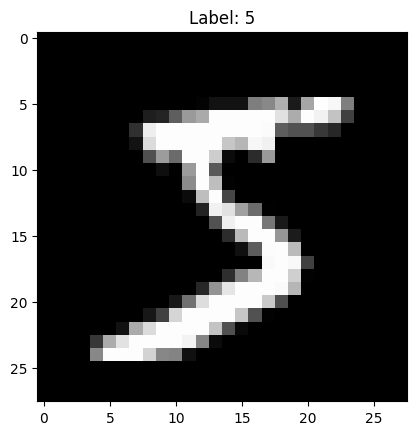

In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Plot the first image
first_image = x_train[0]
plt.imshow(first_image, cmap='gray')  # 'gray' for grayscale
plt.title(f"Label: {y_train[0]}")  # Display the label (the digit)
plt.show()

# Preprocessing

In [5]:
x_train_flat = x_train.reshape(-1, 28*28)
x_train_flat = x_train_flat.astype('float32') / 255

x_test_flat = x_test.reshape(-1, 28*28)
x_test_flat = x_test_flat.astype('float32') / 255

In [5]:
# Reshape the 1D array into a 28x28 grid
first_digit_grid = x_train_flat[0].reshape(28, 28)

# Print the 28x28 grid with values >0 in red
for row in first_digit_grid:
    formatted_row = [f"\033[91m{val:5.2f}\033[0m" if val > 0 else f"{val:5.2f}" for val in row]
    print(" ".join(formatted_row))

 0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00
 0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00
 0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00
 0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00
 0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00
 0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.00  0.01  0.07  0.07  0.07  0.49  0.53  0.69  0.10  0.65  1.00  0.97  0.50  0.00  0.00  0.0

In [18]:
# Perform grid search for C scores
svc = LinearSVC(dual=False, random_state=42)
params_grid = {"C": [10**k for k in range(-3, 2)]}
clf = GridSearchCV(svc, params_grid, return_train_score=True, n_jobs=5, verbose=4)

clf.fit(x_train_flat, y_train)
print("Best parameters:", clf.best_params_)
print("Best cross-validation score:", clf.best_score_)
print("Test set accuracy:", clf.score(x_test_flat, y_test))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ........C=0.01;, score=(train=0.920, test=0.913) total time=  26.9s
[CV 4/5] END ........C=0.01;, score=(train=0.922, test=0.906) total time=  28.1s
[CV 3/5] END ........C=0.01;, score=(train=0.921, test=0.909) total time=  28.3s
[CV 2/5] END ........C=0.01;, score=(train=0.920, test=0.909) total time=  30.5s
[CV 5/5] END ........C=0.01;, score=(train=0.919, test=0.920) total time=  31.9s
[CV 1/5] END .........C=0.1;, score=(train=0.926, test=0.915) total time=  51.0s
[CV 2/5] END .........C=0.1;, score=(train=0.926, test=0.910) total time=  52.8s
[CV 3/5] END .........C=0.1;, score=(train=0.927, test=0.908) total time=  55.7s
[CV 5/5] END .........C=0.1;, score=(train=0.924, test=0.920) total time=  52.9s
[CV 4/5] END .........C=0.1;, score=(train=0.928, test=0.905) total time=  54.4s
[CV 1/5] END ...........C=1;, score=(train=0.928, test=0.914) total time= 1.1min
[CV 2/5] END ...........C=1;, score=(train=0.929,

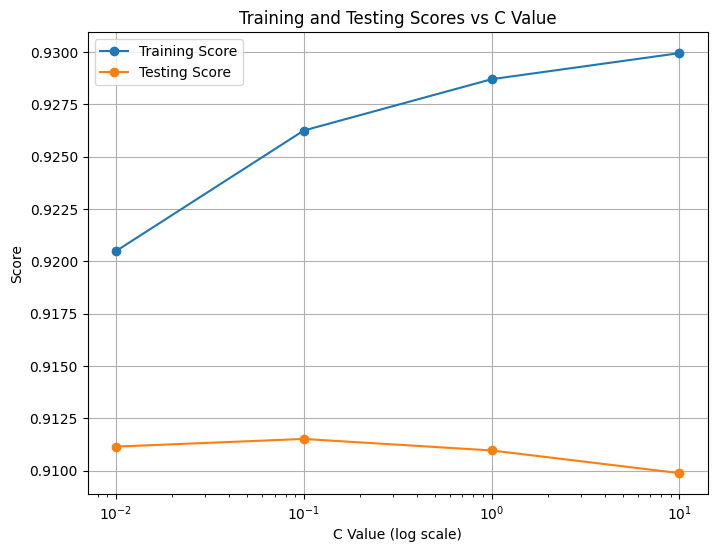

In [21]:
plot_scores(clf, params_grid)

In [ ]:
# Perform grid search for C scores
svc = LinearSVC(dual=False, random_state=42)
params_grid = {"C": [.001,0.01]}
clf = GridSearchCV(svc, params_grid, return_train_score=True, n_jobs=5, verbose=4)

clf.fit(x_train_flat, y_train)
print("Best parameters:", clf.best_params_)
print("Best cross-validation score:", clf.best_score_)
print("Test set accuracy:", clf.score(x_test_flat, y_test))

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[CV 1/5] END .......C=0.001;, score=(train=0.907, test=0.906) total time=  18.4s
[CV 2/5] END .......C=0.001;, score=(train=0.907, test=0.900) total time=  18.6s
[CV 3/5] END .......C=0.001;, score=(train=0.908, test=0.899) total time=  18.7s
[CV 4/5] END .......C=0.001;, score=(train=0.910, test=0.898) total time=  18.9s
[CV 5/5] END .......C=0.001;, score=(train=0.906, test=0.913) total time=  19.1s


### Standardize the Data
Standardize the data to have a mean of 0 and a standard deviation of 1 before applying PCA.

In [6]:
# Standardize the data
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train_flat)
x_test_scaled = scaler.transform(x_test_flat)

### Apply PCA

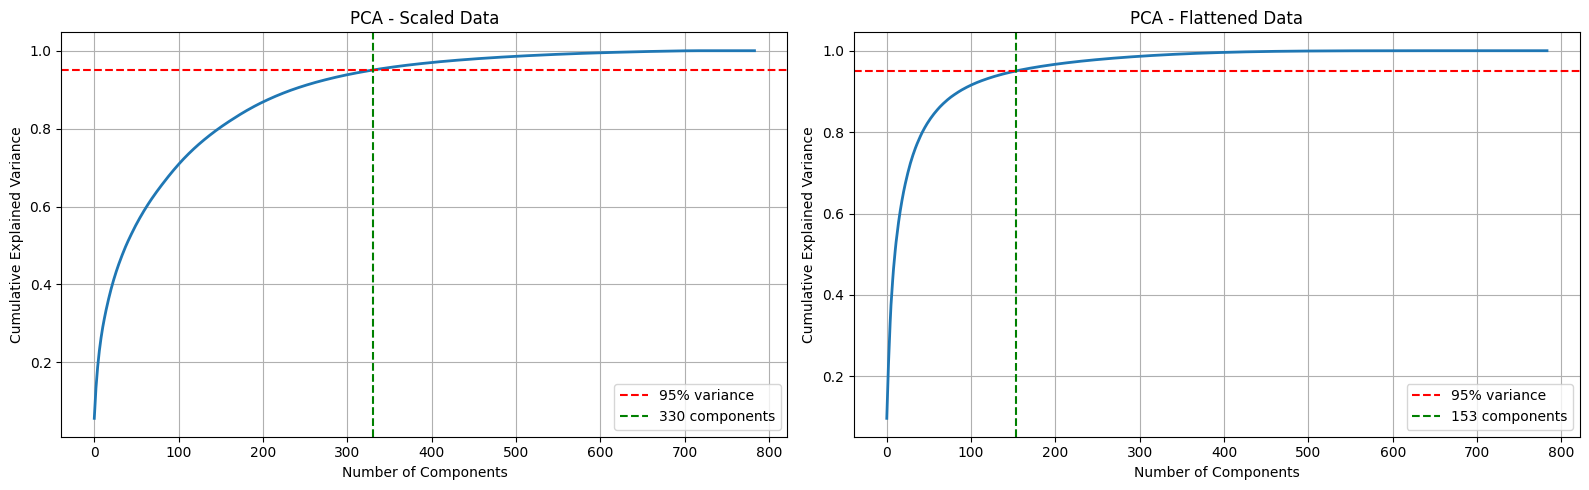

In [7]:
# Fit PCA on flattened data
pca_flat = PCA()
pca_flat.fit(x_train_flat)

# Fit PCA on scaled data
pca_scaled = PCA()
pca_scaled.fit(x_train_scaled)

# Calculate cumulative explained variance based on flattened and scaled data
cumulative_variance_flat = np.cumsum(pca_flat.explained_variance_ratio_)
cumulative_variance_scaled = np.cumsum(pca_scaled.explained_variance_ratio_)

# Plot cumulative variance for both scaled and flattened data
plt.figure(figsize=(16, 5))

# Plot for scaled data
plt.subplot(1, 2, 1)
plt.plot(cumulative_variance_scaled, linewidth=2)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Scaled Data')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% variance')
plt.axvline(x=np.argmax(cumulative_variance_scaled >= 0.95), color='g', linestyle='--',
            label=f"{np.argmax(cumulative_variance_scaled >= 0.95)} components")
plt.legend(loc='lower right')

# Plot for flattened data
plt.subplot(1, 2, 2)
plt.plot(cumulative_variance_flat, linewidth=2)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Flattened Data')
plt.grid(True)
plt.axhline(y=0.95, color='r', linestyle='--', label='95% variance')
plt.axvline(x=np.argmax(cumulative_variance_flat >= 0.95), color='g', linestyle='--',
            label=f"{np.argmax(cumulative_variance_flat >= 0.95)} components")
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

# UMAP

### Trustworthiness

#### Fitting PCA model at full dimension size to demonstrate baseline trustworthiness

In [ ]:
pca = PCA(n_components=784)
embedding = pca.fit_transform(x_train_scaled)

# Define subset size to avoid memory issues
subset_size = 10000 
x_train_subset = x_train_scaled[:subset_size]
embedding_subset = embedding[:subset_size]

trust = trustworthiness(x_train_subset, embedding_subset, n_neighbors=5)
print(f"PCA trustworthiness (784 components): {trust:.4f}")

PCA trustworthiness (784 components): 1.0000


In [ ]:
# Train an SVC model on the PCA-transformed data with 784 components
print("Training SVC model on PCA-transformed data with 784 components...")
svc_model = make_pipeline(StandardScaler(), SVC(kernel='linear', random_state=42))
svc_model.fit(embedding, y_train)

# Evaluate the model on the training set
y_train_pred = svc_model.predict(embedding)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training accuracy of SVC on PCA 784 components: {train_accuracy:.4f}")

# Evaluate the model on the test set
x_test_pca = pca.transform(x_test_scaled)
y_test_pred = svc_model.predict(x_test_pca)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test accuracy of SVC on PCA 784 components: {test_accuracy:.4f}")

Training SVC model on PCA-transformed data with 784 components...


#### Finding Trustworthiness of UMAP Models at different manifold sizes

Fitting UMAP with 2 components...
Trustworthiness for 2 components: 0.9399
Fitting UMAP with 10 components...
Trustworthiness for 2 components: 0.9399
Fitting UMAP with 10 components...
Trustworthiness for 10 components: 0.9769
Fitting UMAP with 50 components...
Trustworthiness for 50 components: 0.9765
Fitting UMAP with 100 components...
Trustworthiness for 100 components: 0.9760


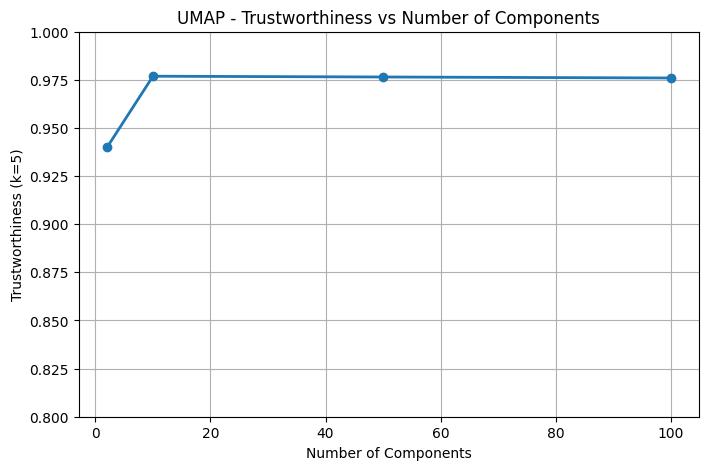

In [ ]:
components = [2, 10, 50, 100, 500, 784]
trust_scores = []


for n in components:
    print(f"Fitting UMAP with {n} components...")
    umap_model = UMAP(n_components=n, random_state=42)
    embedding = umap_model.fit_transform(x_train_scaled)

    # Use a subset of the data for trustworthiness calculation (avoids memory issues)
    subset_size = 10000
    x_train_subset = x_train_scaled[:subset_size]
    embedding_subset = embedding[:subset_size]
    trust = trustworthiness(x_train_subset, embedding_subset, n_neighbors=5)
    trust_scores.append(trust)
    print(f"Trustworthiness for {n} components: {trust:.4f}")

# Plotting trustworthiness vs. components
plt.figure(figsize=(8, 5))
plt.plot(components, trust_scores, marker='o', linewidth=2)
plt.xlabel('Number of Components')
plt.ylabel('Trustworthiness (k=5)')
plt.title('UMAP - Trustworthiness vs Number of Components')
plt.ylim(0.8, 1.0)
plt.grid(True)
plt.show()


### Function to Graph 2-Component UMAP Emeddings

In [17]:
def plot_umap_embeddings(embeddings, labels=None, title_prefix="UMAP Embedding"):
    """
    Plot UMAP 2-component embeddings.

    Parameters:
    - embeddings: List of 2D numpy arrays or a single 2D numpy array.
    - labels: List of labels for each embedding (optional).
    - title_prefix: Prefix for the plot titles.
    """
    if isinstance(embeddings, np.ndarray):
        embeddings = [embeddings]

    num_embeddings = len(embeddings)
    if num_embeddings == 1:
        fig, ax = plt.subplots(figsize=(8, 6))
        embedding = embeddings[0]
        if labels is not None:
            if len(labels) != embedding.shape[0]:
                raise ValueError(f"Labels size ({len(labels)}) does not match embedding size ({embedding.shape[0]}).")
            scatter_kwargs = {'c': labels, 'cmap': 'viridis', 's': 10}
        else:
            scatter_kwargs = {}
        scatter = ax.scatter(embedding[:, 0], embedding[:, 1], **scatter_kwargs)
        if labels is not None:
            plt.colorbar(scatter, ax=ax, label="Digit Label")
        ax.set_title(f"{title_prefix}")
        ax.set_xlabel("Component 1")
        ax.set_ylabel("Component 2")
        ax.grid(True)
    else:
        cols = 3
        rows = (num_embeddings + cols - 1) // cols

        fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))
        axes = np.array(axes).reshape(-1)  # Flatten axes for easy indexing

        for i, embedding in enumerate(embeddings):
            ax = axes[i]
            if labels is not None:
                if len(labels) != embedding.shape[0]:
                    raise ValueError(f"Labels size ({len(labels)}) does not match embedding size ({embedding.shape[0]}).")
                scatter_kwargs = {'c': labels, 'cmap': 'viridis', 's': 10}
            else:
                scatter_kwargs = {}
            scatter = ax.scatter(embedding[:, 0], embedding[:, 1], **scatter_kwargs)
            if labels is not None:
                plt.colorbar(scatter, ax=ax, label="Digit Label")
            ax.set_title(f"{title_prefix} {i + 1}")
            ax.set_xlabel("Component 1")
            ax.set_ylabel("Component 2")
            ax.grid(True)

        # Hide unused subplots
        for j in range(num_embeddings, len(axes)):
            axes[j].axis('off')

    plt.tight_layout()
    plt.show()

### Optimizing 2-component UMAP manifold

In [ ]:
def evaluate_umap_trustworthiness(x_train_scaled, n_components, n_neighbors_values, subset_size=10000):
    """
    Evaluate trustworthiness of UMAP embeddings for a given number of components and a range of n_neighbors.

    Parameters:
    - x_train_scaled: Scaled training data.
    - n_components: Number of components for UMAP.
    - n_neighbors_values: List of n_neighbors values to test.
    - subset_size: Size of the subset to use for trustworthiness calculation (default: 10000).

    Returns:
    - trust_scores: List of trustworthiness scores corresponding to n_neighbors_values.
    """

    trust_scores = []

    # Define subset size to avoid memory issues
    x_train_subset = x_train_scaled[:subset_size]

    for n_neighbors in n_neighbors_values:
        print(f"Fitting UMAP with n_neighbors={n_neighbors}...")
        umap_model = UMAP(n_components=n_components, n_neighbors=n_neighbors, random_state=42)
        embedding = umap_model.fit_transform(x_train_subset)

        # Calculate trustworthiness
        trust = trustworthiness(x_train_subset, embedding, n_neighbors=5)
        trust_scores.append(trust)
        print(f"Trustworthiness for n_neighbors={n_neighbors}: {trust:.4f}")

    # Plotting trustworthiness vs. n_neighbors
    plt.figure(figsize=(8, 5))
    plt.plot(n_neighbors_values, trust_scores, marker='o', linewidth=2)
    plt.xlabel('Number of Neighbors (n_neighbors)')
    plt.ylabel('Trustworthiness')
    plt.title(f'Trustworthiness vs n_neighbors for {n_components}-Component UMAP')
    plt.grid(True)
    plt.show()

    return trust_scores

##### Testing w/ n_neighbors =5, 10

Fitting UMAP with n_neighbors=5...
Trustworthiness for n_neighbors=5: 0.9520
Fitting UMAP with n_neighbors=10...
Trustworthiness for n_neighbors=5: 0.9520
Fitting UMAP with n_neighbors=10...
Trustworthiness for n_neighbors=10: 0.9433
Trustworthiness for n_neighbors=10: 0.9433


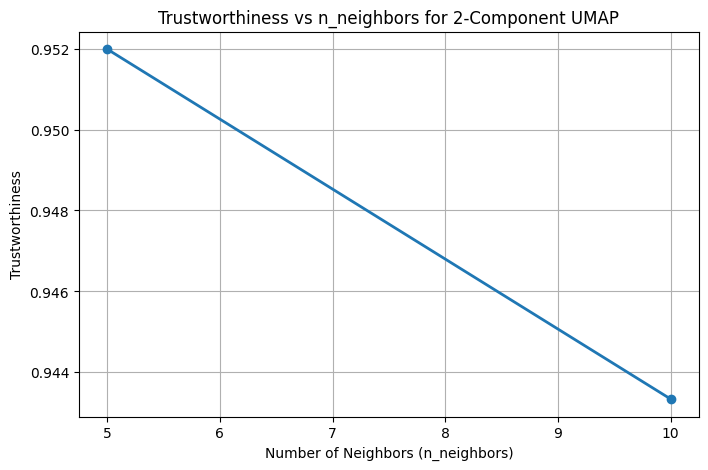

[np.float64(0.9519890272217775), np.float64(0.9433345116092874)]

In [21]:
evaluate_umap_trustworthiness(x_train_scaled, n_components=2, n_neighbors_values=[5,10])

##### Testing between 3 and 5 n_neighbors
- For some reason, evaluating trustworthiness with n_neighbors=2 takes 5+ mins, so I am not including it

Fitting UMAP with n_neighbors=3...
Trustworthiness for n_neighbors=3: 0.9545
Fitting UMAP with n_neighbors=4...
Trustworthiness for n_neighbors=3: 0.9545
Fitting UMAP with n_neighbors=4...
Trustworthiness for n_neighbors=4: 0.9531
Fitting UMAP with n_neighbors=5...
Trustworthiness for n_neighbors=4: 0.9531
Fitting UMAP with n_neighbors=5...
Trustworthiness for n_neighbors=5: 0.9520
Trustworthiness for n_neighbors=5: 0.9520


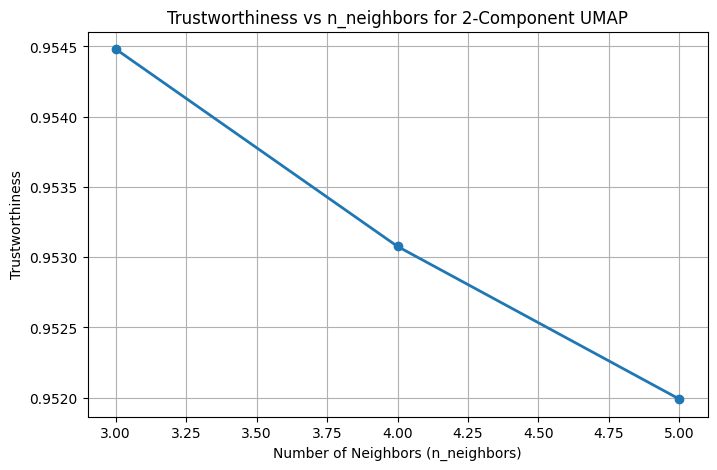

[np.float64(0.9544807425940752),
 np.float64(0.9530758927141714),
 np.float64(0.9519890272217775)]

In [24]:
evaluate_umap_trustworthiness(x_train_scaled, n_components=2, n_neighbors_values=[3, 4, 5])

### Testing SVC on Optimal 2-Component UMAP

In [19]:

# Create a UMAP model with 2 components and n_neighbors=3
print("Fitting UMAP with n_neighbors=3 and n_components=2...")
umap_model = UMAP(n_components=2, random_state=42)

# Fit and transform the training data
x_train_umap = umap_model.fit_transform(x_train_scaled)
x_test_umap = umap_model.transform(x_test_scaled)

Fitting UMAP with n_neighbors=3 and n_components=2...


/home/quantum/github/ECCS_3401/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/home/quantum/github/ECCS_3401/.venv/lib/python3.10/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/home/quantum/github/ECCS_3401/.venv/lib/python3.10/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


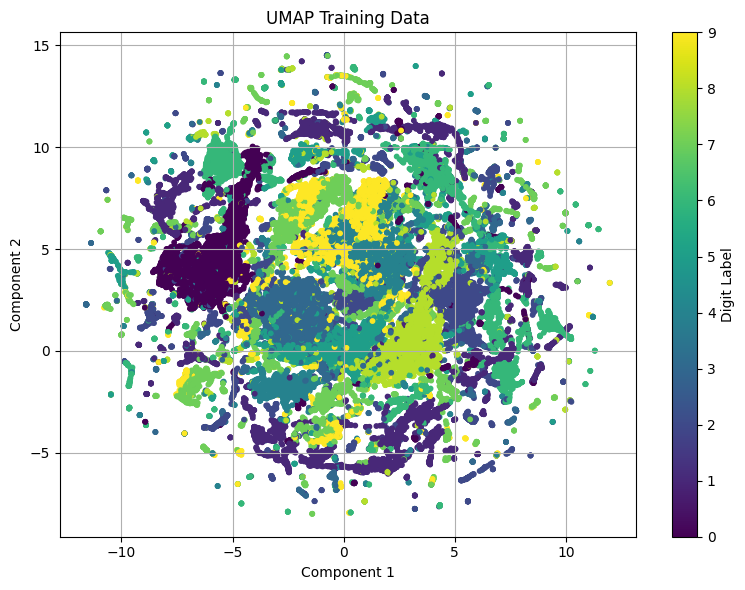

In [18]:
plot_umap_embeddings(x_train_umap, labels=y_train, title_prefix="UMAP Training Data")

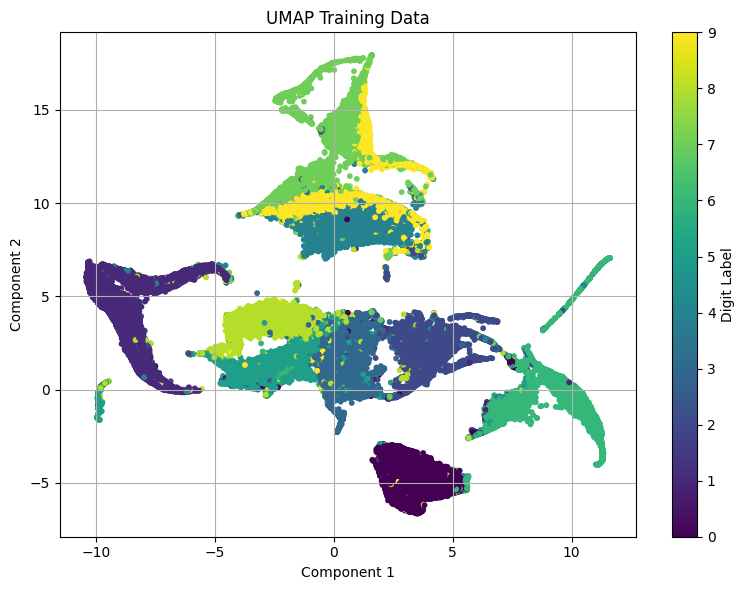

In [20]:
plot_umap_embeddings(x_train_umap, labels=y_train, title_prefix="UMAP Training Data")

In [21]:

# Train an SVC model on the UMAP-transformed data
print("Training SVC model on UMAP-transformed data...")
svc_model = make_pipeline(StandardScaler(), SVC(kernel='linear', random_state=42))
svc_model.fit(x_train_umap, y_train)

# Evaluate the model on the training set
y_train_pred = svc_model.predict(x_train_umap)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training accuracy of SVC on UMAP 2-component manifold with n_neighbors=3: {train_accuracy:.4f}")

# Evaluate the model on the test set
y_test_pred = svc_model.predict(x_test_umap)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test accuracy of SVC on UMAP 2-component manifold with n_neighbors=3: {test_accuracy:.4f}")

Training SVC model on UMAP-transformed data...
Training accuracy of SVC on UMAP 2-component manifold with n_neighbors=3: 0.8658
Test accuracy of SVC on UMAP 2-component manifold with n_neighbors=3: 0.8685


# IGNORE

In [ ]:
from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions
pca = PCA(n_components=330)
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

print("PCA Performed; dimensions reduced from", x_train_scaled.shape[1], "to", x_train_pca.shape[1])
print("PCA shape:", x_train_pca.shape)

# Train SVC model on PCA-transformed data
svc_model_pca = LinearSVC(max_iter=10000)
svc_model_pca.fit(x_train_pca, y_train)

PCA Performed; dimensions reduced from 784 to 330
PCA shape: (60000, 330)


In [ ]:
accuracy_pca = svc_model_pca.score(x_test_pca, y_test)
print("Test accuracy with PCA:", accuracy_pca)

# Find Optimal C Hyperparameter

In [ ]:
def find_best_c(x_train, y_train):
    c_values = range(1, 10)

    # Use this to store our results
    scores = np.ones((len(c_values), 5))

    for (i,c_candidate) in enumerate(c_values):
        print("Cross validating for %d..." % c_candidate)

        # Initializing our model with the given C value 
        model = LinearSVC(C=c_candidate, random_state=42)
        current_scores = cross_val_score(model, x_train_pca, y_train, cv=5)
        scores[i] = current_scores
    return scores

# Find the best C value for pca-transformed data
scores = find_best_c(x_train_pca, y_train)